In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np

import sys
from pathlib import Path

# Add project paths
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

# Import experiment management from HDMF src folder
from fastHDMF.simulation_runner import HDMFSimulationRunner
from fastHDMF.experiment_manager import ExperimentManager
from fastHDMF.plotting import HDMFResultsPlotter
from fastHDMF.utils.data_loading import load_all_sc_matrices

category_colors = {
    'Static': '#FF1F5B',     # Dark orange
    'Dynamic': '#00CD6C',    # Teal
    'LowLR': '#5F9EA0',      # Slate blue / cadet blue
    'HighLR': '#A93226',     # Dark red
    'STR': '#009E73',        # Green (same as Dynamic, can adjust if needed)
    'SCORE': '#882E72'       # Purple
}



# Figure 2

In [25]:
experiment_manager = ExperimentManager(project_root, config_path="Homeostatic_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()
plotter = HDMFResultsPlotter(experiment_manager)

2025-09-22 15:48:02,609 - hdmf_experiment_Homeostatic_Grid - INFO - Experiment 'Homeostatic_Grid' initialized
2025-09-22 15:48:02,610 - hdmf_experiment_Homeostatic_Grid - INFO - Config: Homeostatic grid for objective rate 3.44. Used to then calculate LR->DECAY coefficients. Now supports custom parameter generation functions.
2025-09-22 15:48:02,611 - hdmf_experiment_Homeostatic_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Homeostatic_Grid
2025-09-22 15:48:02,620 - hdmf_experiment_Homeostatic_Grid - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml


In [26]:
res['full_results']['observables']['mean_rates'].shape

(11000, 17)

In [27]:
hom_grid = np.stack(res['full_results']['observables']['mean_rates'].flatten())
hom_grid = np.reshape(hom_grid, (100,110,17,90))
hom_grid = 3.44 - np.mean(hom_grid, axis=-1)
hom_grid_mean = np.mean(hom_grid, axis=2)
hom_grid_std = np.std(hom_grid, axis=2)


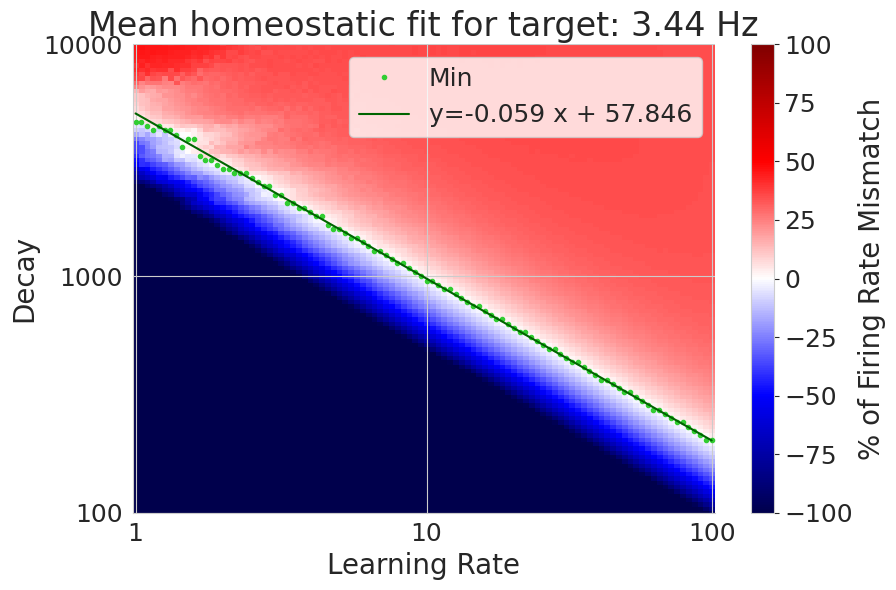

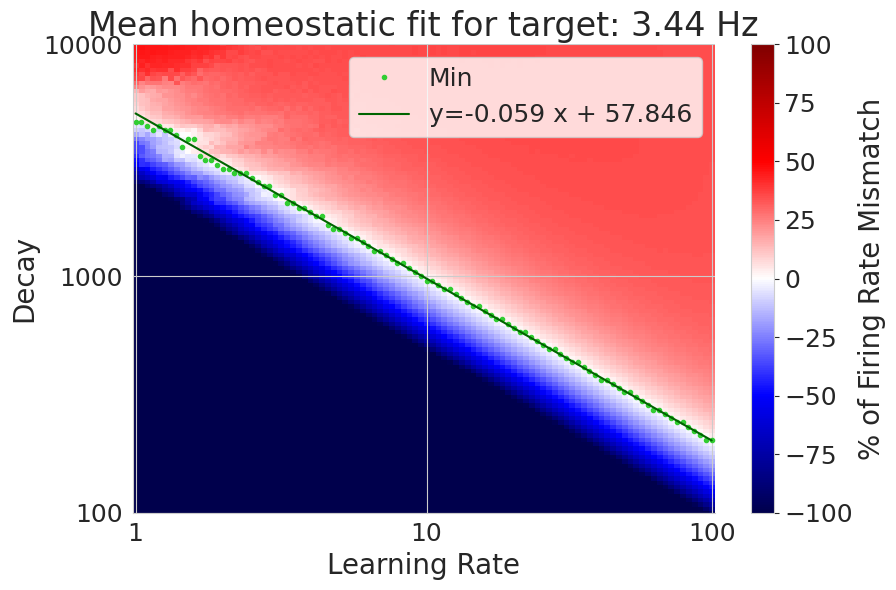

In [28]:
plotter.plot_homeostatic_fit(hom_grid)

In [29]:

experiment_manager = ExperimentManager(project_root, config_path="Static_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_static = experiment_manager.load_experiment_results()
experiment_manager = ExperimentManager(project_root, config_path="Dynamic_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_dynamic = experiment_manager.load_experiment_results()
experiment_manager = ExperimentManager(project_root, config_path="Mixed_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_mixed = experiment_manager.load_experiment_results()


2025-09-22 16:10:16,582 - hdmf_experiment_Static_Stability - INFO - Experiment 'Static_Stability' initialized
2025-09-22 16:10:16,584 - hdmf_experiment_Static_Stability - INFO - Config: Showing firing rate stability across G values in the static model
2025-09-22 16:10:16,585 - hdmf_experiment_Static_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Static_Stability
2025-09-22 16:10:16,593 - hdmf_experiment_Static_Stability - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Stability.yaml
2025-09-22 16:10:16,617 - hdmf_experiment_Dynamic_Stability - INFO - Experiment 'Dynamic_Stability' initialized
2025-09-22 16:10:16,619 - hdmf_experiment_Dynamic_Stability - INFO - Config: Showing firing rate stability across G values in the dynamic model
2025-09-22 16:10:16,620 - hdmf_experiment_Dynamic_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Dynamic_Stability


2025-09-22 16:10:16,635 - hdmf_experiment_Dynamic_Stability - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml
2025-09-22 16:10:16,659 - hdmf_experiment_Mixed_Stability - INFO - Experiment 'Mixed_Stability' initialized
2025-09-22 16:10:16,661 - hdmf_experiment_Mixed_Stability - INFO - Config: Showing firing rate stability across G values in the static model
2025-09-22 16:10:16,662 - hdmf_experiment_Mixed_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Mixed_Stability
2025-09-22 16:10:16,675 - hdmf_experiment_Mixed_Stability - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Stability.yaml
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml


In [11]:
import os
# Define the data path
data_path = "/home/ivan.mindlin/Desktop/DatosParaRuben/ChequeoPreliminar"

# Load the results from the specified directory
dyn_fic_reps = np.load(os.path.join(data_path, "dyn_fic_reps.npy"))
stat_fic_reps = np.load(os.path.join(data_path, "stat_fic_reps.npy"))
stat_fic_reps = stat_fic_reps.reshape((dyn_fic_reps.shape), order='F').astype(np.float32)

avg_fr_dyn_values = np.load(os.path.join(data_path, "avg_fr_dyn_reps.npy"))
avg_fr_stat_values = np.load(os.path.join(data_path, "avg_fr_stat_reps.npy"))
avg_fr_mixed_values = np.load(os.path.join(data_path, "avg_fr_mix_reps.npy"))
G_values = np.load(os.path.join(data_path, "G_values.npy"))

In [30]:
dyn_fic_reps = res_dynamic['full_results']['observables']['mean_fic']
stat_fic_reps = res_static['full_results']['observables']['mean_fic']

avg_fr_dyn_values = res_dynamic['full_results']['observables']['mean_rates'].mean(axis=-1)
avg_fr_stat_values = res_static['full_results']['observables']['mean_rates'].mean(axis=-1)
avg_fr_mixed_values = res_mixed['full_results']['observables']['mean_rates'].mean(axis=-1)
G_values = res_dynamic['full_results']['axis_values']['G']

In [31]:
from scipy.stats import pearsonr
# Calculate the correlation between the repetitions of dynamic and static FIC
corr_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        corr_values[i,j] = pearsonr(dyn_fic_reps[i, j, :], stat_fic_reps[i, j, :])[0]
# Calculate the mean and standard deviation of the correlation values
mean_corr_values = np.mean(corr_values, axis=1)
std_corr_values = np.std(corr_values, axis=1)
# Calcualte the MSE between the repetitions of dynamic and static FIC
mse_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        mse_values[i,j] = np.mean((dyn_fic_reps[i, j, :] - stat_fic_reps[i, j, :])**2)
# Calculate the mean and standard deviation of the MSE values
mean_mse_values = np.mean(mse_values, axis=1)
std_mse_values = np.std(mse_values, axis=1)

In [37]:
avg_fr_dyn_values[10:30,:10].mean(axis=1)

array([3.54511013, 3.5579906 , 3.57112027, 3.58437067, 3.59759645,
       3.61064089, 3.62334845, 3.63554886, 3.64708397, 3.65780841,
       3.66762205, 3.67646157, 3.68431981, 3.69123194, 3.69724408,
       3.7024657 , 3.70816048, 3.71198774, 3.69299224, 3.72048819])

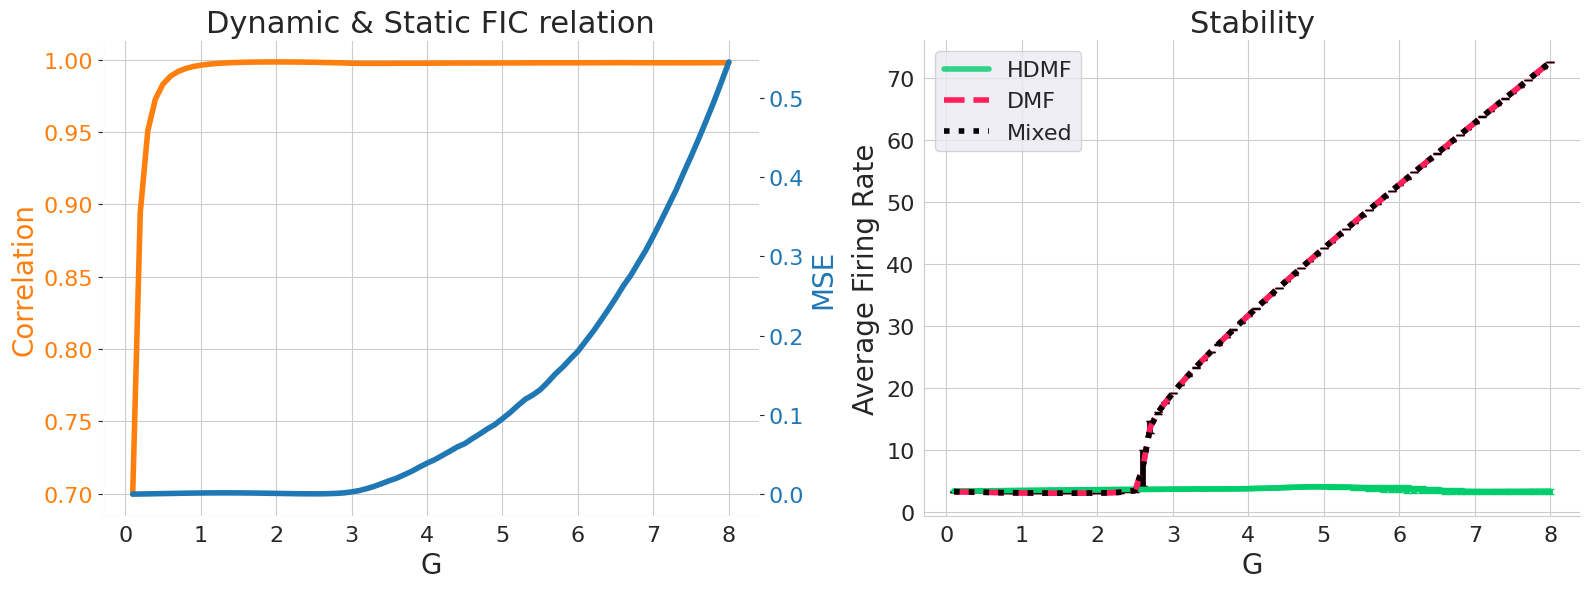

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define figure parameters
TITLE = 22
LABEL = 20
TICKS = 16
LEGEND = 16

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
with sns.axes_style("darkgrid"):
    # Subplot 1: Shared y-axis plot for Correlation and MSE
    ax1 = axes[0]
    color = 'tab:orange'
    ax1.set_xlabel('G', fontsize=LABEL)
    ax1.set_ylabel('Correlation', color=color, fontsize=LABEL)
    ax1.plot(G_values, mean_corr_values, color=color, label='Correlation', linewidth=4)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=TICKS)
    ax1.tick_params(axis='x', labelsize=TICKS)
with sns.axes_style("dark"):
    # MSE (Right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('MSE', color=color, fontsize=LABEL)
    ax2.plot(G_values, mean_mse_values, color=color, label='MSE',linewidth=4)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=TICKS)

ax1.set_title('Dynamic & Static FIC relation', fontsize=TITLE)
with sns.axes_style("darkgrid"):
    # Subplot 2: Stability plot
    ax3 = axes[1]

    # Dynamic FIC: plot mean with shaded standard deviation
    mean_dyn = np.mean(avg_fr_dyn_values, axis=1)
    std_dyn = np.std(avg_fr_dyn_values, axis=1)       
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_dyn,
            '-',
            color=category_colors['Dynamic'],
            linewidth=4,
            alpha=0.8,
            label='HDMF')
    ax3.errorbar(
        G_values,
        mean_dyn,
        yerr=std_dyn,
        fmt='-',
        color=category_colors['Dynamic'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )


    # Static FIC: plot mean with shaded standard deviation (dashed line)
    mean_stat = np.mean(avg_fr_stat_values, axis=1)
    std_stat = np.std(avg_fr_stat_values, axis=1)
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_stat,
            '--',
            color=category_colors['Static'],
            linewidth=4,
            label='DMF')
    ax3.errorbar(
        G_values,
        mean_stat,
        yerr=std_stat,
        fmt='--',
        color=category_colors['Static'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )

    # Mixed values: plot each repetition with shaded error

    mix_rep = np.mean(avg_fr_mixed_values, axis=1)
    mix_std = np.std(avg_fr_mixed_values, axis=1)    

    ax3.plot(G_values,
            mix_rep,
            ':',
            color='black',
            linewidth=4,
            label='Mixed')
    ax3.errorbar(
            G_values,
            mix_rep,
            yerr=mix_std,
            fmt=':',
            color='black',
            linewidth=4,
            capsize=3,
            label='_nolegend_',
        )

    ax3.set_xlabel('G', fontsize=LABEL)
    ax3.set_ylabel('Average Firing Rate', fontsize=LABEL)
    ax3.tick_params(axis='x', labelsize=TICKS)
    ax3.tick_params(axis='y', labelsize=TICKS)
    ax3.set_title('Stability', fontsize=TITLE)
    handles, labels = ax3.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax3.legend(unique.values(), unique.keys(), fontsize=LEGEND)


# Adjust layout and save the figure
plt.tight_layout()
#fig.savefig(figfold + 'FIG_2_C_D_combined.png', dpi=300)
#fig.savefig(figfold + 'FIG_2_C_D_combined.svg', dpi=300)
plt.show()


# Fig 5

In [3]:
experiment_manager = ExperimentManager(project_root, config_path="SW_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()

2025-09-17 16:27:28,123 - hdmf_experiment_SW_Grid - INFO - Experiment 'SW_Grid' initialized
2025-09-17 16:27:28,125 - hdmf_experiment_SW_Grid - INFO - Config: Slow wave grid search test
2025-09-17 16:27:28,126 - hdmf_experiment_SW_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/SW_Grid
2025-09-17 16:27:28,145 - hdmf_experiment_SW_Grid - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml


INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml


In [ ]:
res['full_results']['observables']['max_freqs_rates']

(4, 4, 30)